In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
from skimage.io import imread,imsave
from skimage.color import rgb2gray

In [49]:

corners = np.float32([(388,256),(520,3600),(5500,3420),(5452,176)])

corners = np.float32([(160,540),(256,5600),(3632,5500),(3424,500)])


image = imread("grid/IMG_0003.JPG")
image = rgb2gray(image)

In [50]:
h, w = image.shape[:2]
target = np.float32([(0,0),(0,h),(w,h),(w,0)])
M = cv2.getPerspectiveTransform(corners, target)
warped = cv2.warpPerspective(image, M, (w, h), flags=cv2.INTER_LINEAR)

In [51]:
#tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
#h, theta, d = hough_line(image, theta=tested_angles)

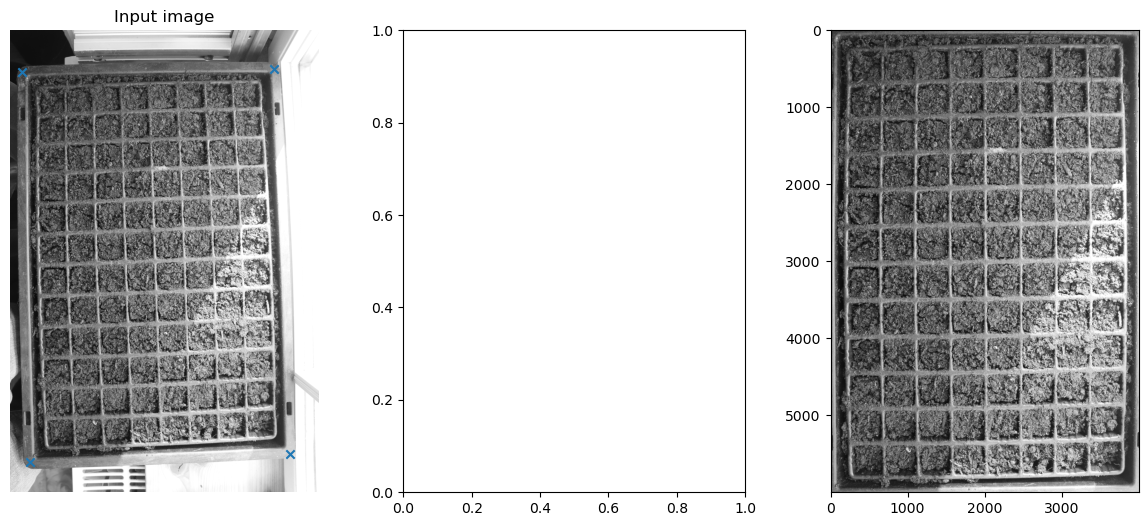

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input image')
ax[0].set_axis_off()
ax[0].scatter(*zip(*corners),marker='x')



ax[2].imshow(warped, cmap='gray')
#ax[2].set_ylim((image.shape[0], 0))
#ax[2].set_axis_off()
#ax[2].set_title('Detected lines')

#for _, angle, dist in zip(*hough_line_peaks(h, theta, d,min_angle=85,num_peaks=10,min_distance=500)):
#    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
#    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2))

#plt.tight_layout()
#plt.show()

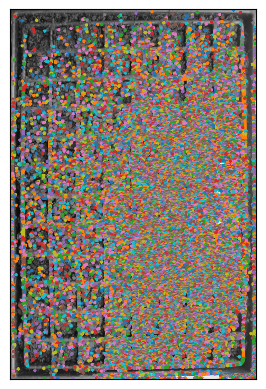

In [53]:
from skimage import measure
contours = measure.find_contours(warped, 0.8)


fig, ax = plt.subplots()
ax.imshow(warped, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()
